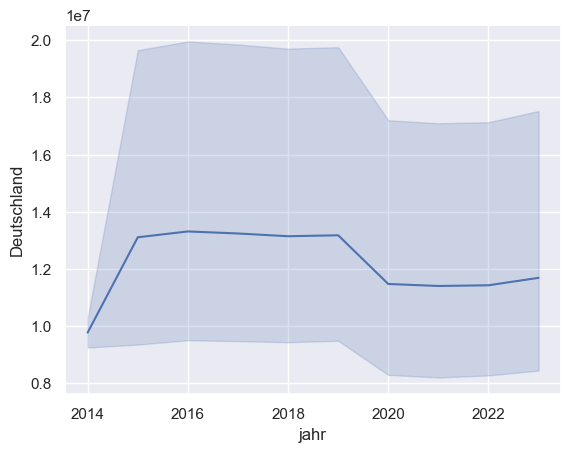

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()
# Incorporate data from https://raw.githubusercontent.com/plotly/datasets/master/
df = pd.read_csv('data/23131-0005_de_san.csv', sep=';')




fig, ax = plt.subplots()
sns.lineplot(data = df, x='jahr', y='Deutschland');
#sns.lineplot(data = df, x='jahr', y='bett')
 

# Foo

In [3]:
# Import packages
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
from dd import DataDictionary as dd

# Incorporate data from https://raw.githubusercontent.com/plotly/datasets/master/
#df = pd.read_csv('data/kosten_transp.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/solar.csv')

#external_stylesheets = ['https://esm.sh/@markprompt/css@0.18.0/markprompt.css']
#app = Dash(external_stylesheets=external_stylesheets,)
 
app = Dash()
dta = df.to_dict('records')
keys = list(df.keys())
del(keys[0])
del(keys[-1])
#print(keys)
opt = [{'label': dd.trans(k), 'value': k} for k in keys ]
# App layout
fig  = px.line(df, x='jahr')
 
app.layout = [
    html.H1(children='Krankenhaus Grunddaten'),
    #html.Hr(),
    
    dash_table.DataTable(data=dta, columns=[{"name": i, "id": i} for i in df.columns], page_size=5),
    dcc.Checklist(options=opt, id='controls-and-check-item', value=['pkv', 'gkv']),
    dcc.Graph(figure=fig, id='controls-and-graph')
]
#fig, ax = plt.subplots()

#exit()
# Add controls to build the interaction
@callback(
    Output(component_id='controls-and-graph', component_property='figure'),
    Input(component_id='controls-and-check-item', component_property='value')
)
def update_graph(col_chosen):
    print(col_chosen)
    foo = df[col_chosen]
    fig = px.line(foo, x='jahr', y=k)
    return fig

if __name__ == '__main__':
    app.run(debug=False, port=4711)

ValueError: Non-existent key Deutschland!

In [4]:


from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv"
)

app = Dash(__name__)

app.layout = html.Div(
    [
        html.H4("Apple stock candlestick chart"),
        
        dcc.Checklist(
            id="toggle-rangeslider",
            options=[{"label": "Include Rangeslider", "value": "slider"}],
            value=["slider"],
        ),
        dcc.Graph(id="graph"),
    ]
)


@app.callback(
    Output("graph", "figure"),
    Input("toggle-rangeslider", "value"),
)
def display_candlestick(value):
    fig = go.Figure(
        go.Candlestick(
            x=df["Date"],
            open=df["AAPL.Open"],
            high=df["AAPL.High"],
            low=df["AAPL.Low"],
            close=df["AAPL.Close"],
        )
    )
    fig.update_layout(xaxis_rangeslider_visible="slider" in value)
    return fig


if __name__ == "__main__":
    app.run(debug=False, port=8081)

In [24]:
import dash
from dash import Input, Output, dcc, html
import plotly.graph_objects as go
import dash_bootstrap_components as dbc
import pandas as pd

# Reading the data and filling missing data
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/hofstede-cultural-dimensions.csv",
    delimiter=";",
)
df.replace(to_replace="#NULL!", value=0, inplace=True)

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])


# Country selection card
controls = dbc.Card(
    [
        html.Div(
            [
                dbc.Label("Select Country"),
                dcc.Dropdown(
                    id="country",
                    options=[{"label": ctr, "value": ctr} for ctr in df["country"]],
                    value=["U.S.A.", "Turkey", "Korea South"],
                    multi=True,
                ),
            ]
        )
    ]
)

# Description card
tabs = dbc.Card(
    dbc.CardBody(
        dbc.Tabs(
            [
                dbc.Tab(
                    "The power distance index considers the extent to which inequality and power are tolerated. In this dimension, inequality and power are viewed from the viewpoint of the followers – the lower level.",
                    label="Power Distance",
                ),
                dbc.Tab(
                    "The individualism vs. collectivism dimension considers the degree to which societies are integrated into groups and their perceived obligations and dependence on groups.",
                    label="Individualism",
                ),
                dbc.Tab(
                    "The masculinity vs. femininity dimension is also referred to as “tough vs. tender,” and considers the preference of society for achievement, attitude towards sexuality equality, behavior, etc.",
                    label="Masculinity",
                ),
                dbc.Tab(
                    "The uncertainty avoidance index considers the extent to which uncertainty and ambiguity are tolerated. This dimension considers how unknown situations and unexpected events are dealt with.",
                    label="Uncertainty Avoidance",
                ),
                dbc.Tab(
                    "The long-term orientation vs. short-term orientation dimension considers the extent to which society views its time horizon.",
                    label="Long-Term Orientation",
                ),
                dbc.Tab(
                    "The indulgence vs. restraint dimension considers the extent and tendency for a society to fulfill its desires. In other words, this dimension revolves around how societies can control their impulses and desires.",
                    label="Indulgence",
                ),
            ]
        )
    )
)


app.layout = dbc.Container(
    [
        html.H1("Hofstede's Cultural Dimensions"),
        dash_table.DataTable(data=df.to_dict('records'), columns=[{"name": i, "id": i} for i in df.columns], page_size=5),
        html.Hr(),
        dbc.Row(
            [
                dbc.Col([controls, html.Br(), tabs], lg=4, sm=12),
                dbc.Col(dcc.Graph(id="graph-country"), lg=8, sm=12),
            ],
            align="center",
        ),
    ]
)


# Update Bar Chart Callback Function
@app.callback(Output("graph-country", "figure"), Input("country", "value"))
def make_country_graph(country_list):
    dff = df[df.country.isin(country_list)]

    fig = go.Figure()

    for country in dff.country:
        dft = dff[dff.country == country].reset_index()
        dft = dft.iloc[:, 3:].T.astype(int)
        fig.add_trace(
            go.Bar(
                x=[
                    "Power Distance",
                    "Individualism",
                    "Masculinity",
                    "Uncertainty Avoidance",
                    "Long Term Orientation",
                    "Indulgence",
                ],
                y=dft.iloc[:, 0],
                name=country,
            )
        )

    fig.update_layout(xaxis_tickfont_size=10)

    return fig


if __name__ == "__main__":
    app.run(debug=False, port=9999) 

[2025-07-11 17:43:42,204] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/svenschrodt/projects/pybyex/.venv/lib/python3.13/site-packages/flask/app.py", line 1511, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/svenschrodt/projects/pybyex/.venv/lib/python3.13/site-packages/flask/app.py", line 919, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/svenschrodt/projects/pybyex/.venv/lib/python3.13/site-packages/flask/app.py", line 917, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/svenschrodt/projects/pybyex/.venv/lib/python3.13/site-packages/flask/app.py", line 902, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
           ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^
  File "/Users/svenschrodt/projects/pybyex/.venv/lib/python3.13/site-packages/dash/da

## Sunburst plot

In [27]:
from dash import Dash, Input, Output, html, dcc
import dash_bootstrap_components as dbc
import plotly.express as px
import numpy as np

df = px.data.gapminder()

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container(
    dbc.Row(
        [
            dbc.Col(
                [
                    html.Label("Select year:"),
                    dcc.Dropdown(
                        id="year",
                        options=df.year.unique(),
                        value=1992,
                        clearable=False,
                    ),
                ],
                width=3,
            ),
            dbc.Col(
                [dcc.Graph(id="graph")],
                width=9,
            ),
        ]
    )
)


@app.callback(
    Output("graph", "figure"), Input("year", "value")
)
def generate_graph(year):
    dff = px.data.gapminder().query(f"year == {year}")
    fig = px.sunburst(
        dff,
        path=["continent", "country"],
        values="pop",
        color="lifeExp",
        hover_data=["iso_alpha"],
        color_continuous_scale="RdBu",
        color_continuous_midpoint=np.average(df["lifeExp"], weights=df["pop"]),
    )

    fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
    return fig


if __name__ == "__main__":
    app.run(debug=False, port=5003)